In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

2023-10-17 13:33:09.755645: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-17 13:33:09.776461: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 13:33:09.949572: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 13:33:09.951660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 13:33:10.642242: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [15]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0646 - val_loss: 0.0384
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0313 - val_loss: 0.0258
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0234 - val_loss: 0.0212
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0204 - val_loss: 0.0189
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0184 - val_loss: 0.0174
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0172 - val_loss: 0.0163
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.0154
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0153 - val_loss: 0.0145
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0145 - val_loss: 0.0137
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0137 - val_loss: 0.0130

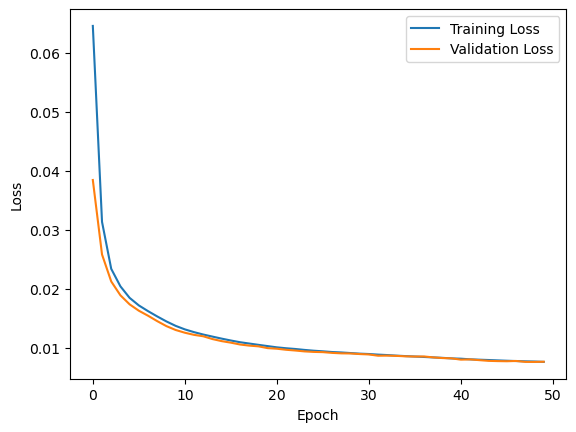

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()